In [1]:
from sklearn import tree

X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)


In [2]:
from sklearn.datasets import load_iris
from sklearn import tree
from IPython.display import Image  
import pydotplus 


/Users/cemgil/anaconda/envs/py27/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


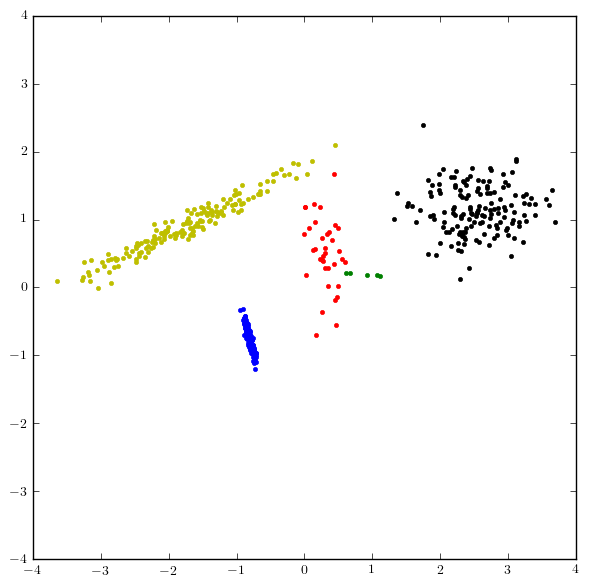

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Limits of the domain
Lim = 4

# Number of components
N = 5

# Generate random mixture parameters
w = np.random.rand(N)
w = w/np.sum(w)
mu = []
Sig = []

for i in range(N):
    mu.append(np.random.randn(2))
    A = np.random.randn(2,2)/3
    Sig.append(A.dot(A.T))
    
# Number of data points
T = N*100
# Number of points from each cluster center
Ts = np.random.multinomial(T, w)
X = []
C = []
for i in range(N):
    x = np.random.multivariate_normal(mu[i], Sig[i], Ts[i])
    c = np.ones(Ts[i])*i
    X.append(x)
    C.append(c)

XX = np.concatenate(X,axis=0)
CC = np.concatenate(C,axis=0)

from sklearn import tree

plt.figure(figsize=(7,7))
plt.rc('text', usetex=True)
#plt.rc('font', family='serif')

ax = plt.gca()
ax.set_xlim(-Lim,Lim)
ax.set_ylim(-Lim,Lim)

col = ['r','b','g','k','y','m']

for i in range(N):
    plt.plot(X[i][:,0],X[i][:,1],'.'+col[i%len(col)])

    
plt.show()

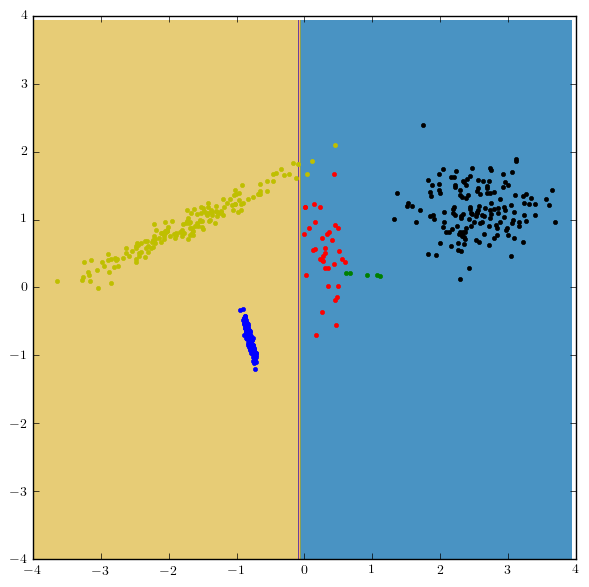

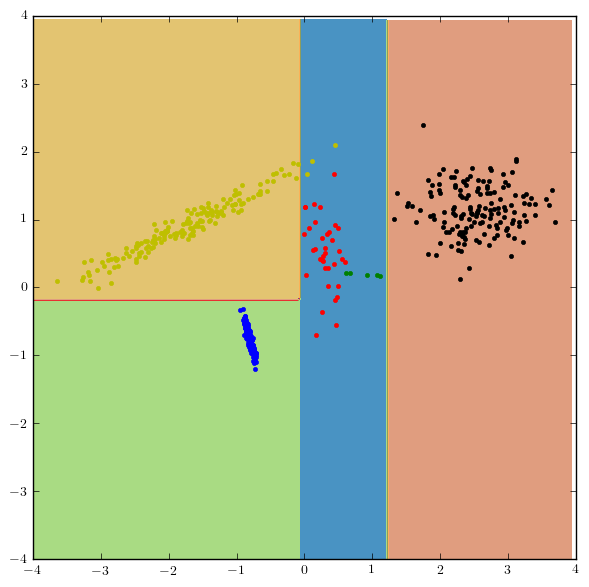

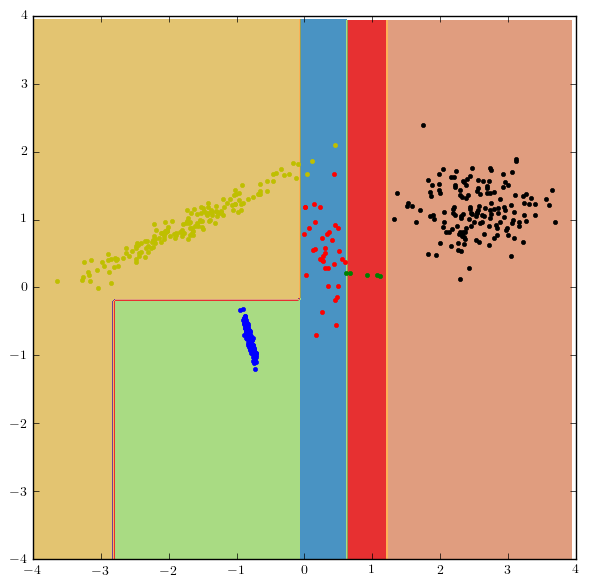

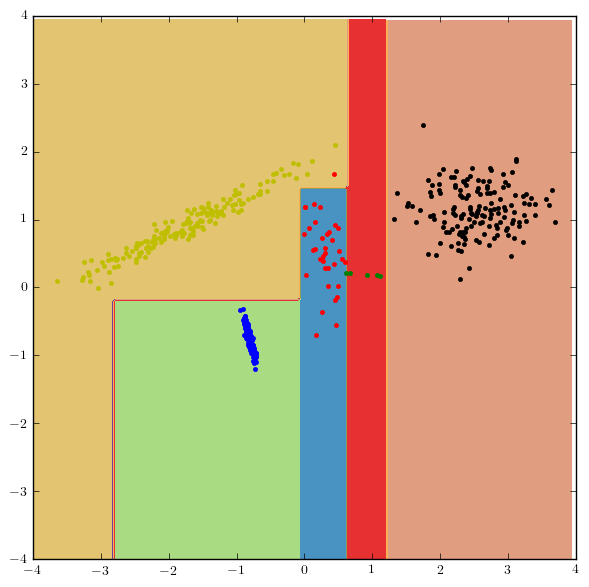

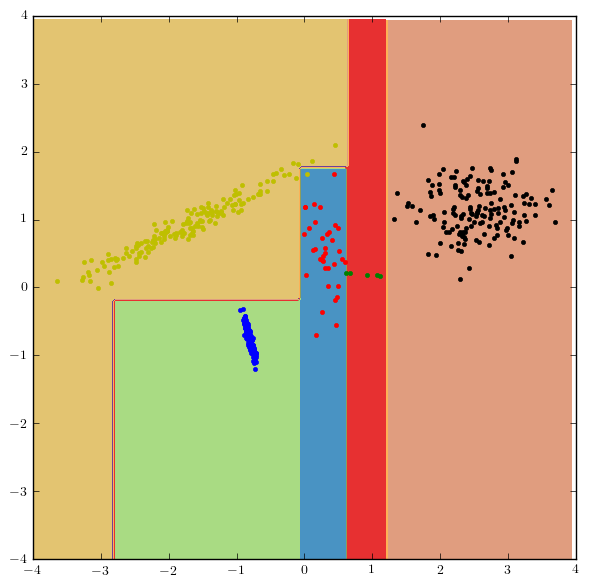

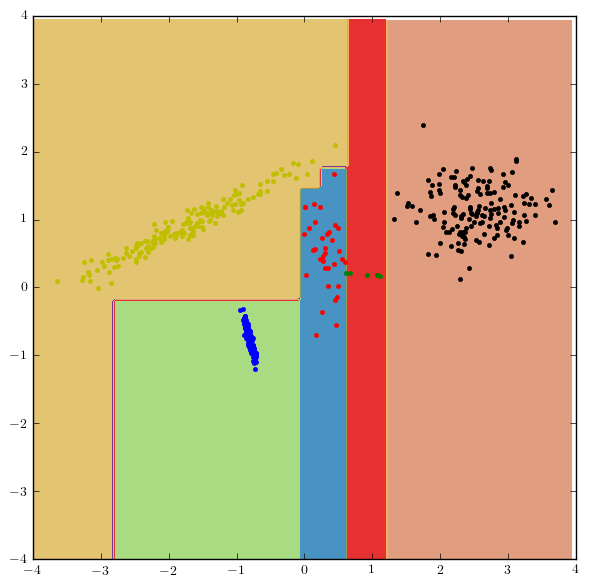

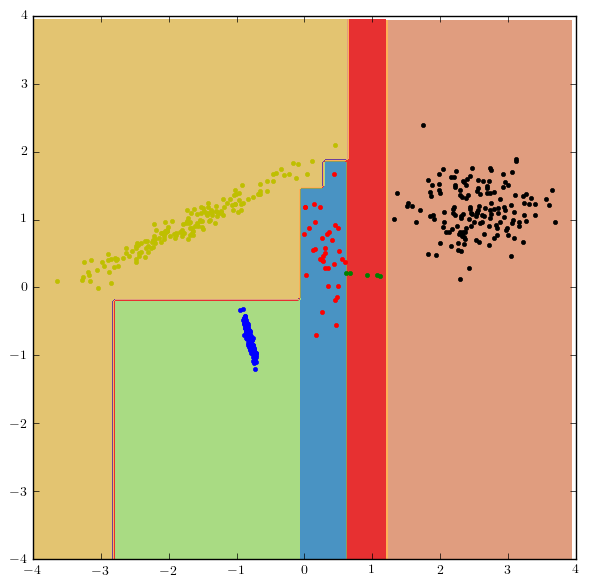

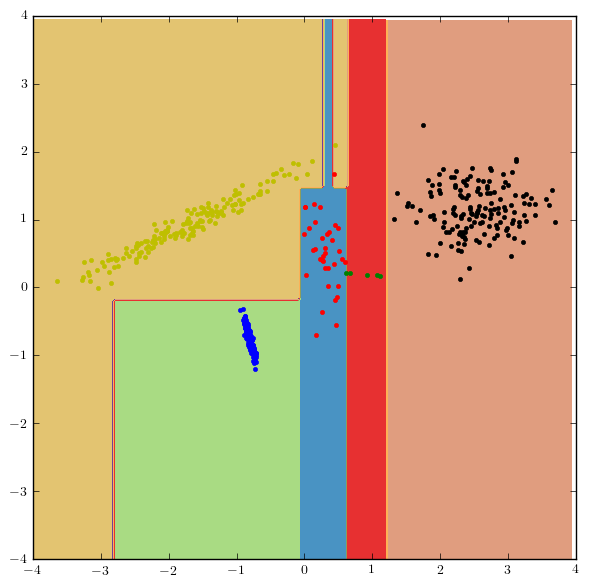

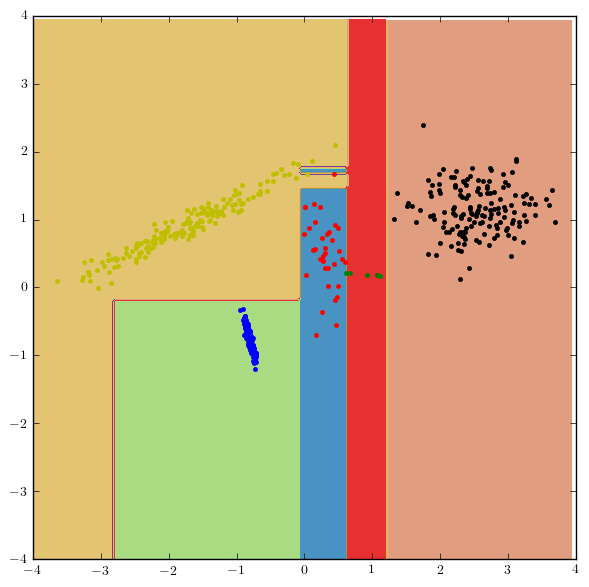

In [4]:
for depth in range(1,10):
    clf = tree.DecisionTreeClassifier(max_depth=depth, criterion='entropy')
    clf = clf.fit(XX, CC)

    plot_step = 0.05
    plt.figure(figsize=(7,7))

    ax = plt.gca()
    ax.set_xlim(-Lim,Lim)
    ax.set_ylim(-Lim,Lim)

    x_min, x_max = -Lim, Lim
    y_min, y_max = -Lim, Lim
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    col = ['r','b','g','k','y','m']

    for i in range(N):
        plt.plot(X[i][:,0],X[i][:,1],'.'+col[i%len(col)])


 

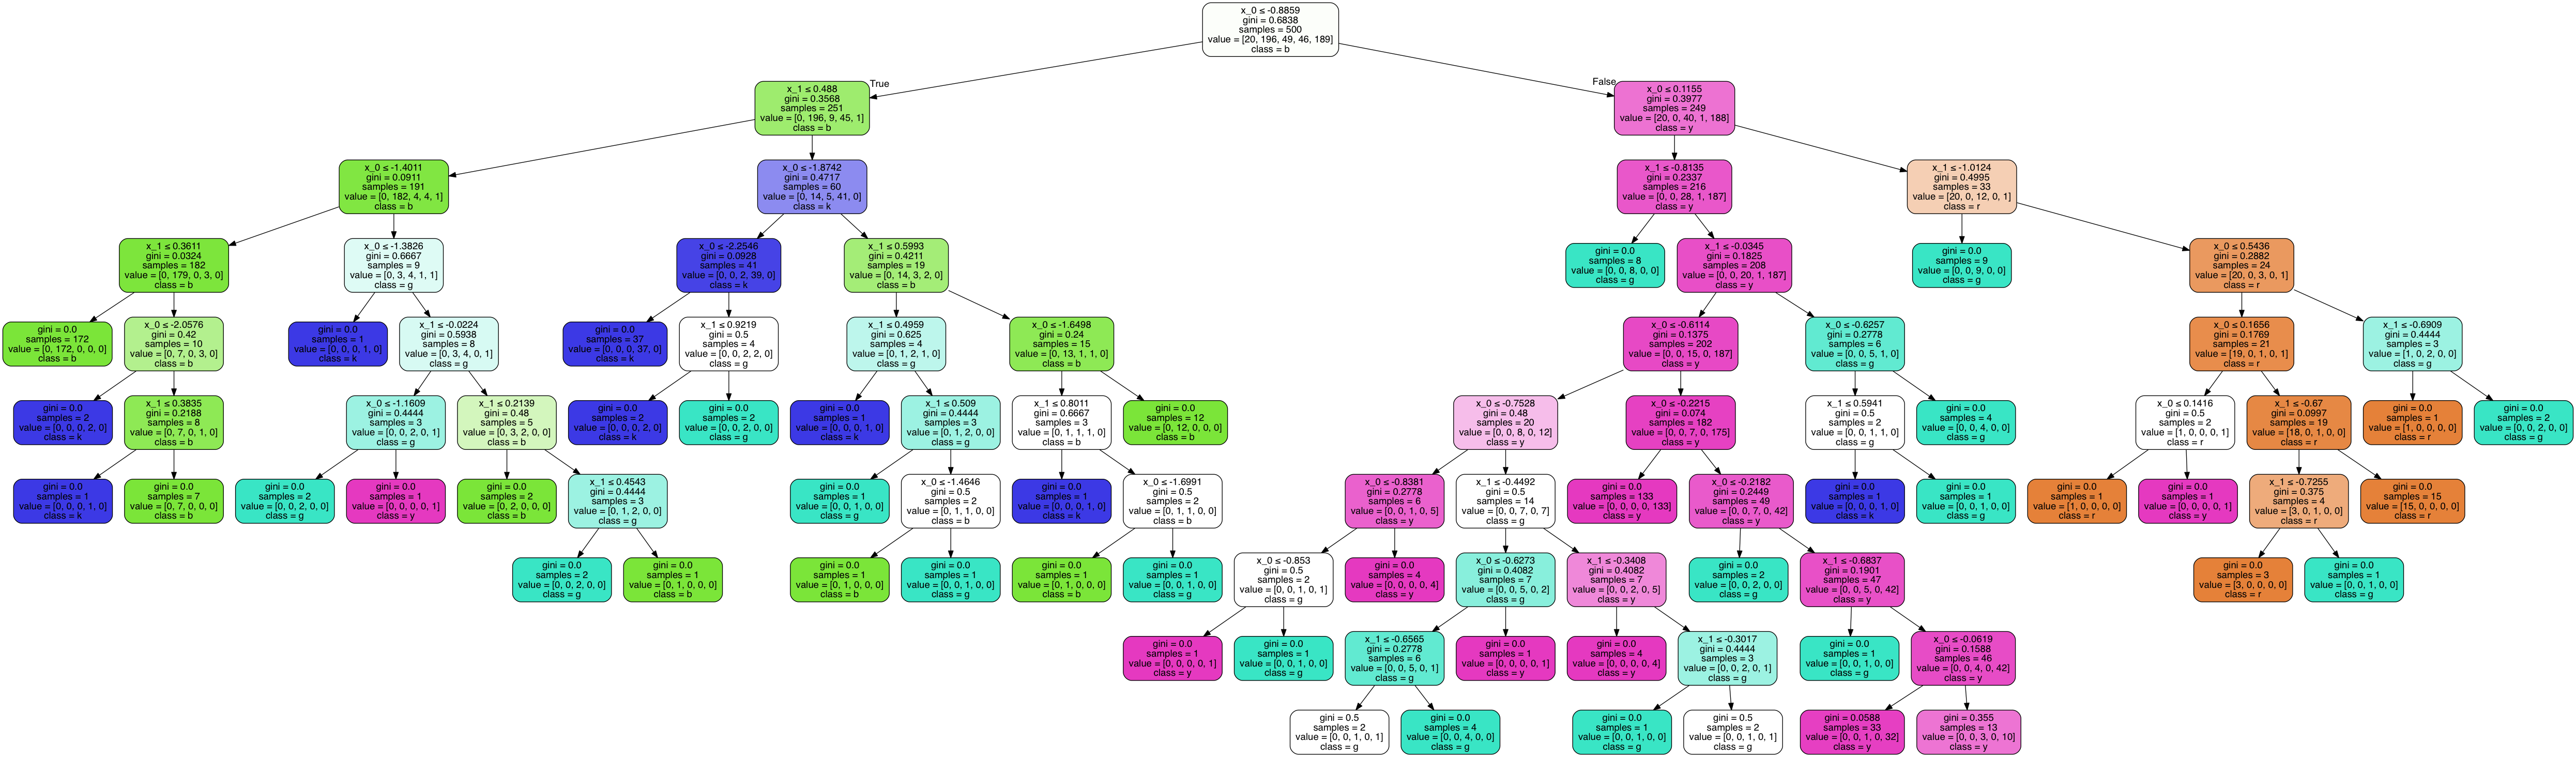

In [9]:
   

class_names = col[0:N]
feature_names = ['x_0','x_1']
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=feature_names, class_names=class_names, filled=True, rounded=True, special_characters=True)  

graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

#plt.show()

In [18]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc

def entropy(p):
    return -np.sum(np.log2(p)*p)

In [26]:
p = np.array([2.,1.])
p = p/np.sum(p)

entropy(p)*3./4

0.68872187554086717

In [27]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

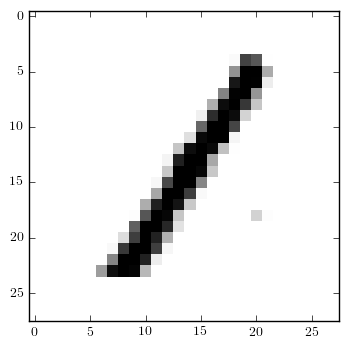

In [38]:
plt.imshow(mnist.data[10000].reshape(28,28),cmap='gray_r',interpolation='nearest')
plt.show()

In [5]:
# %load template.py
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# list
a = [[1],"hjakshkjs",(2,3),'a',[4,6]]

idx = range(2,5)

#print(idx)
[len(a[i]) for i in idx]

a.append(3)

# tuple
v = (1,4,5)

# dictionary
#c = {5*i+2: i*12 + 5 for i in range(5)}

c = {"ali": 5, "b": 4}

c["ali"]

# set
u = set([1,2,3,3,4])
w = set([1,4,5])

def fun(c):
    return [c, c**2]

fun(5)

a = 1,2

a = range(10)
a = [i*3 for i in a]
print(a)



[0, 3, 6, 9, 12, 15, 18, 21, 24, 27]


0

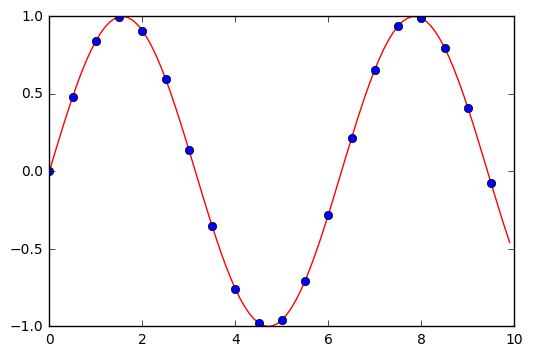

In [19]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

#x = [i/10. for i in range(11)]
#y = [w**2 for w in x]

x = np.arange(0,10,0.1)
y = np.sin(x)

idx = range(20)

plt.plot(x,y,'r-')
plt.plot(x[0:-1:5],y[0:-1:5],'bo')
plt.show()



In [32]:
x = np.arange(0,1,0.1)

x[3] = np.nan
x[8] = np.nan

In [33]:
print(x)
x[np.isnan(x)] = 0

x[x>0.5] = 0
print(x)

[ 0.   0.1  0.2  nan  0.4  0.5  0.6  0.7  nan  0.9]
[ 0.   0.1  0.2  0.   0.4  0.5  0.   0.   0.   0. ]


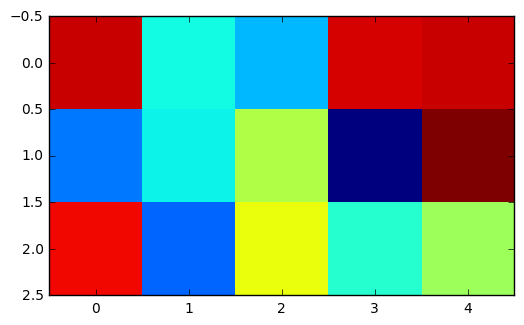

[[ 0.90962  0.41086  0.35353  0.89871  0.90931]
 [ 0.2988   0.40624  0.58201  0.08074  0.96803]
 [ 0.87981  0.28019  0.64287  0.43416  0.55944]]


In [58]:
np.set_printoptions(precision=5)

A = np.random.rand(3,5)

plt.imshow(A, interpolation='nearest')
plt.show()
print(A)

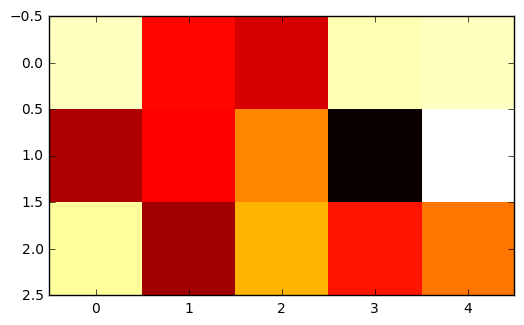

In [63]:
A/np.sum(A,axis=1, keepdims=True)
plt.imshow(A, interpolation='nearest', cmap=plt.cm.hot)
plt.show()

In [90]:
A = np.random.randn(4,4)
b = np.random.randn(4)

x = np.linalg.solve(A, b)

print(b)
print(A.dot(x))

[ 0.52542 -0.36419 -0.62482  0.16549]
[ 0.52542 -0.36419 -0.62482  0.16549]
